<a href="https://colab.research.google.com/github/tkdforever18/Carlos/blob/main/LendingClub_Team_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [113]:
df = pd.read_csv("/content/drive/MyDrive/LCS.csv")

In [114]:
pd.set_option("display.max_columns", None)
df.head()

,Unnamed: 0,mths_since_recent_inq,num_tl_120dpd_2m,mo_sin_old_il_acct,bc_util,percent_bc_gt_75,bc_open_to_buy,mths_since_recent_bc,pct_tl_nvr_dlq,avg_cur_bal,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,num_rev_accts,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mo_sin_rcnt_tl,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,tot_hi_cred_lim,total_il_high_credit_limit,num_bc_sats,num_sats,acc_open_past_24mths,mort_acc,total_bal_ex_mort,total_bc_limit,revol_util,dti,pub_rec_bankruptcies,collections_12_mths_ex_med,chargeoff_within_12_mths,tax_liens,inq_last_6mths,delinq_2yrs,open_acc,pub_rec,total_acc,acc_now_delinq,delinq_amnt,annual_inc,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,fico_range_low,fico_range_high,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,policy_code,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,1,4,0,148,37.2,0.0,1506.0,4,76.9,20701,128,3,9,722.0,144904.0,9300.0,3,2,2,4,5,3,4,4,0,0,3,178050.0,13734.0,2,7,4,1,7746.0,2400.0,29.7,5.91,0,0,0,0,1,0,7,0,13,0,0,55000.0,3600,3600,3600.0,13.99,123.03,675,679,2765.0,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,564,560,1,68407277,36 months,C,C4,leadman,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,Debt consolidation,190xx,PA,Aug-2003,w,Jan-2019,Mar-2019,Individual,N,Cash,N
1,2,0,0,113,27.1,7.7,57830.0,2,97.4,9733,192,2,27,0.0,204396.0,111800.0,2,0,5,5,17,6,20,5,0,0,2,314017.0,24667.0,13,22,4,4,39475.0,79300.0,19.2,16.06,0,0,0,0,4,1,22,0,38,0,0,65000.0,24700,24700,24700.0,11.99,820.28,715,719,21470.0,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,699,695,1,68355089,36 months,C,C1,Engineer,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,small_business,Business,577xx,SD,Dec-1999,w,Jun-2016,Mar-2019,Individual,N,Cash,N
2,3,10,0,125,55.9,50.0,2737.0,101,100.0,31617,184,14,7,0.0,189699.0,14000.0,14,0,2,3,4,6,4,3,0,0,0,218418.0,14877.0,2,6,6,5,18696.0,6200.0,56.2,10.78,0,0,0,0,0,0,6,0,18,0,0,63000.0,20000,20000,20000.0,10.78,432.66,695,699,7869.0,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,15813.30,704,700,1,68341763,60 months,B,B4,truck driver,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,home_improvement,NaN,605xx,IL,Aug-2000,w,Jun-2017,Mar-2019,Joint App,N,Cash,N
3,4,1,0,128,77.5,60.0,4567.0,4,96.6,27644,210,4,19,0.0,331730.0,34000.0,4,0,4,6,9,10,7,6,0,0,4,439570.0,88097.0,5,12,10,6,95768.0,20300.0,64.5,25.37,0,0,0,0,3,1,12,0,35,0,0,104433.0,10400,10400,10400.0,22.45,289.91,695,699,21929.0,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,10128.96,704,700,1,68476807,60 months,F,F1,Contract Specialist,3 years,MORTGAGE,Source Verified,Dec-2015,Fully Paid,n,major_purchase,Major purchase,174xx,PA,Jun-1998,w,Jul-2016,Mar-2018,Individual,N,Cash,N
4,5,10,0,142,102.9,100.0,0.0,12,96.3,30030,306,10,16,0.0,360358.0,94200.0,10,0,4,6,5,7,9,6,0,0,2,388852.0,46452.0,4,12,6,4,116762.0,31500.0,84.5,14.67,0,0,0,0,0,0,12,0,27,0,0,180000.0,20000,20000,20000.0,9.17,637.58,680,684,87329.0,0.0,0.0,21393.800000,21393.80,20000.0,1393.80,0.0,0.0,0.0,15681.05,654,650,1,68476668,36 months,B,B2,Vice President of Recruiting Operations,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,Debt consolidation,550xx,MN,Jun-1990,f,Nov-2016,Mar-2019,Individual,N,Cash,N


##Limpieza de Datos##

In [115]:
df.dropna(how='all').count()['loan_status']

1793396

In [116]:
pd.set_option('display.max_rows', None)
print(df.isnull().sum().sort_values(ascending=False))

emp_title                     122688
emp_length                    108542
title                          18540
last_pymnt_d                    1760
last_credit_pull_d                29
zip_code                           1
Unnamed: 0                         0
out_prncp_inv                      0
collection_recovery_fee            0
recoveries                         0
total_rec_late_fee                 0
total_rec_int                      0
total_rec_prncp                    0
total_pymnt_inv                    0
total_pymnt                        0
revol_bal                          0
out_prncp                          0
last_fico_range_high               0
fico_range_high                    0
fico_range_low                     0
installment                        0
int_rate                           0
funded_amnt_inv                    0
funded_amnt                        0
loan_amnt                          0
last_pymnt_amnt                    0
id                                 0
l

In [117]:
features_to_select = [
    "loan_status",
    "loan_amnt",
    "int_rate",
    "dti",
    "fico_range_low",
    "fico_range_high",
    "term",
    "tot_hi_cred_lim",
    "total_acc",
    "total_bal_ex_mort",
    "total_bc_limit",
    "total_rec_late_fee",
    "percent_bc_gt_75",
    "avg_cur_bal",
    "total_il_high_credit_limit"
]

In [118]:
df2 = df[features_to_select]

In [119]:
df2.head()

,loan_status,loan_amnt,int_rate,dti,fico_range_low,fico_range_high,term,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_rec_late_fee,percent_bc_gt_75,avg_cur_bal,total_il_high_credit_limit
0,Fully Paid,3600,13.99,5.91,675,679,36 months,178050.0,13,7746.0,2400.0,0.0,0.0,20701,13734.0
1,Fully Paid,24700,11.99,16.06,715,719,36 months,314017.0,38,39475.0,79300.0,0.0,7.7,9733,24667.0
2,Fully Paid,20000,10.78,10.78,695,699,60 months,218418.0,18,18696.0,6200.0,0.0,50.0,31617,14877.0
3,Fully Paid,10400,22.45,25.37,695,699,60 months,439570.0,35,95768.0,20300.0,0.0,60.0,27644,88097.0
4,Fully Paid,20000,9.17,14.67,680,684,36 months,388852.0,27,116762.0,31500.0,0.0,100.0,30030,46452.0


In [120]:
df["loan_status"].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [121]:
# Definir los valores a reemplazar
yes_values = ['Fully Paid', 'Current', 'Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period']
no_values = ['Charged Off', 'Default']

# Reemplazar los valores en la columna
df2['loan_status'] = df2['loan_status'].replace(yes_values, '1').replace(no_values, '0')


In [122]:
df2.head()

,loan_status,loan_amnt,int_rate,dti,fico_range_low,fico_range_high,term,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_rec_late_fee,percent_bc_gt_75,avg_cur_bal,total_il_high_credit_limit
0,1,3600,13.99,5.91,675,679,36 months,178050.0,13,7746.0,2400.0,0.0,0.0,20701,13734.0
1,1,24700,11.99,16.06,715,719,36 months,314017.0,38,39475.0,79300.0,0.0,7.7,9733,24667.0
2,1,20000,10.78,10.78,695,699,60 months,218418.0,18,18696.0,6200.0,0.0,50.0,31617,14877.0
3,1,10400,22.45,25.37,695,699,60 months,439570.0,35,95768.0,20300.0,0.0,60.0,27644,88097.0
4,1,20000,9.17,14.67,680,684,36 months,388852.0,27,116762.0,31500.0,0.0,100.0,30030,46452.0


In [123]:
df2["loan_status"].unique()

array(['1', '0'], dtype=object)

In [124]:
count_loan_status = df2["loan_status"].value_counts(dropna=False)
print(count_loan_status)

1    1576425
0     216971
Name: loan_status, dtype: int64


In [125]:
df2 = df2.dropna(subset=['loan_status'])

In [126]:
count_loan_status = df2["loan_status"].value_counts(dropna=False)
print(count_loan_status)

1    1576425
0     216971
Name: loan_status, dtype: int64


In [127]:
df2['term'] = df2['term'].str.replace(' months', '')

In [128]:
df2.head()

,loan_status,loan_amnt,int_rate,dti,fico_range_low,fico_range_high,term,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_rec_late_fee,percent_bc_gt_75,avg_cur_bal,total_il_high_credit_limit
0,1,3600,13.99,5.91,675,679,36,178050.0,13,7746.0,2400.0,0.0,0.0,20701,13734.0
1,1,24700,11.99,16.06,715,719,36,314017.0,38,39475.0,79300.0,0.0,7.7,9733,24667.0
2,1,20000,10.78,10.78,695,699,60,218418.0,18,18696.0,6200.0,0.0,50.0,31617,14877.0
3,1,10400,22.45,25.37,695,699,60,439570.0,35,95768.0,20300.0,0.0,60.0,27644,88097.0
4,1,20000,9.17,14.67,680,684,36,388852.0,27,116762.0,31500.0,0.0,100.0,30030,46452.0


In [129]:
print(df2.dtypes)

loan_status                    object
loan_amnt                       int64
int_rate                      float64
dti                           float64
fico_range_low                  int64
fico_range_high                 int64
term                           object
tot_hi_cred_lim               float64
total_acc                       int64
total_bal_ex_mort             float64
total_bc_limit                float64
total_rec_late_fee            float64
percent_bc_gt_75              float64
avg_cur_bal                     int64
total_il_high_credit_limit    float64
dtype: object


In [130]:
df2['term'] = df2['term'].str.replace(' months', '').astype(int)

In [131]:
print(df2.dtypes)

loan_status                    object
loan_amnt                       int64
int_rate                      float64
dti                           float64
fico_range_low                  int64
fico_range_high                 int64
term                            int64
tot_hi_cred_lim               float64
total_acc                       int64
total_bal_ex_mort             float64
total_bc_limit                float64
total_rec_late_fee            float64
percent_bc_gt_75              float64
avg_cur_bal                     int64
total_il_high_credit_limit    float64
dtype: object


In [132]:
df2['loan_status'] = df2['loan_status'].astype(int)

In [133]:
print(df2.dtypes)

loan_status                     int64
loan_amnt                       int64
int_rate                      float64
dti                           float64
fico_range_low                  int64
fico_range_high                 int64
term                            int64
tot_hi_cred_lim               float64
total_acc                       int64
total_bal_ex_mort             float64
total_bc_limit                float64
total_rec_late_fee            float64
percent_bc_gt_75              float64
avg_cur_bal                     int64
total_il_high_credit_limit    float64
dtype: object


##Balancear etiquetas##

"loan_status" Label

**##Insertar un gráfico de barras para mostrar los conteos de observaciones en cada categeria usando barras.##**

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

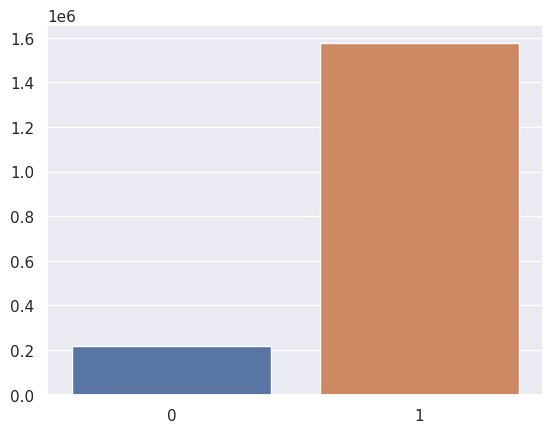

In [135]:
sns.barplot(x=df2['loan_status'].value_counts().index, y=df2['loan_status'].value_counts().values)
plt.show()

In [136]:
df2['loan_status'].value_counts()

1    1576425
0     216971
Name: loan_status, dtype: int64

**##Usar función resample https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html##**

In [137]:
from sklearn.utils import resample
#Crear dos diferentes dataframe de una clase mayoritaria y minoritaria
df2_majority = df2[(df2['loan_status']==1)]
df2_minority = df2[(df2['loan_status']==0)]

# muestreo ascendente de la clase minoritaria
df2_minority_upsampled = resample(df2_minority,
                                 replace=True,     # muestra con reemplazo
                                 n_samples= 1576425, # para que coincida con la clase mayoritaria
                                 random_state=0)   # resultados reproducible

# Combinar la clase mayoritaria con la muestra ascendente de la clase minoritaria
df2_upsampled = pd.concat([df2_minority_upsampled, df2_majority])

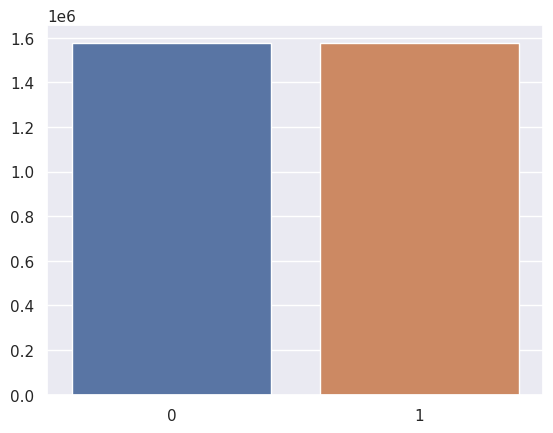

In [142]:
sns.barplot(x=df2_upsampled['loan_status'].value_counts().index, y=df2_upsampled['loan_status'].value_counts().values)
plt.show()

In [139]:
df2_upsampled.shape

(3152850, 15)

# **Eliminar outliers usando IQR**

Detectar outlier es tedioso, especialmente cuando se tienen multiples tipos de datos.

Por lo tanto, tenemos diferentes formas de detectar valores atípicos para diferentes tipos de datos.

En cuanto a los datos distribuidos normalmente, podemos obtener el método Z-Score;

Para skewed data, se usa IQR.

# **IQR es la diferencia entre el cuartil 75th and 25th.**

In [143]:
def remove_outliers_iqr(df2_upsampled, columns):
    for col in columns:
        q1 = df2_upsampled[col].quantile(0.25)
        q3 = df2_upsampled[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df2_upsampled = df2_upsampled[(df2_upsampled[col] >= lower_bound) & (df2_upsampled[col] <= upper_bound)]
    return df2_upsampled

# Señale las columnas para remover los outliers
columns_to_check = [
    "loan_status",
    "loan_amnt",
    "int_rate",
    "dti",
    "fico_range_low",
    "fico_range_high",
    "term",
    "tot_hi_cred_lim",
    "total_acc",
    "total_bal_ex_mort",
    "total_bc_limit",
    "total_rec_late_fee",
    "percent_bc_gt_75",
    "avg_cur_bal",
    "total_il_high_credit_limit"
]

# Solicitar la función que remueve los outliers usando IQR
df2_clean = remove_outliers_iqr(df2_upsampled, columns_to_check)

# Mostrar el resultado en el dataframe
df2_clean.head()

,loan_status,loan_amnt,int_rate,dti,fico_range_low,fico_range_high,term,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_rec_late_fee,percent_bc_gt_75,avg_cur_bal,total_il_high_credit_limit
236642,0,25000,25.89,24.76,665,669,60,69376.0,29,59041.0,12400.0,0.0,75.0,7380,49376.0
1452883,0,28000,17.56,21.61,690,694,36,234540.0,25,30735.0,15300.0,0.0,100.0,22412,36452.0
909423,0,3375,15.59,29.05,670,674,36,12532.0,52,7511.0,1500.0,0.0,50.0,751,8232.0
1473273,0,15050,13.11,15.17,665,669,36,111307.0,21,12821.0,4100.0,0.0,100.0,16241,10604.0
1100825,0,8000,17.57,7.05,660,664,36,11300.0,17,5850.0,6300.0,0.0,33.3,585,0.0


In [144]:
df2_upsampled['loan_status'].value_counts()

0    1576425
1    1576425
Name: loan_status, dtype: int64

In [145]:
df2['loan_status'].value_counts()

1    1576425
0     216971
Name: loan_status, dtype: int64

In [146]:
df2_clean['loan_status'].value_counts()

0    1067685
1    1042155
Name: loan_status, dtype: int64

##Correlación mostrando un heatmap##

Seaborn es una biblioteca de python que permite hacer mejores gráficos fácilmente gracias a su función heatmap(). Un mapa de calor es una representación gráfica de datos donde cada valor de una matriz se representa como un color.

https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: >

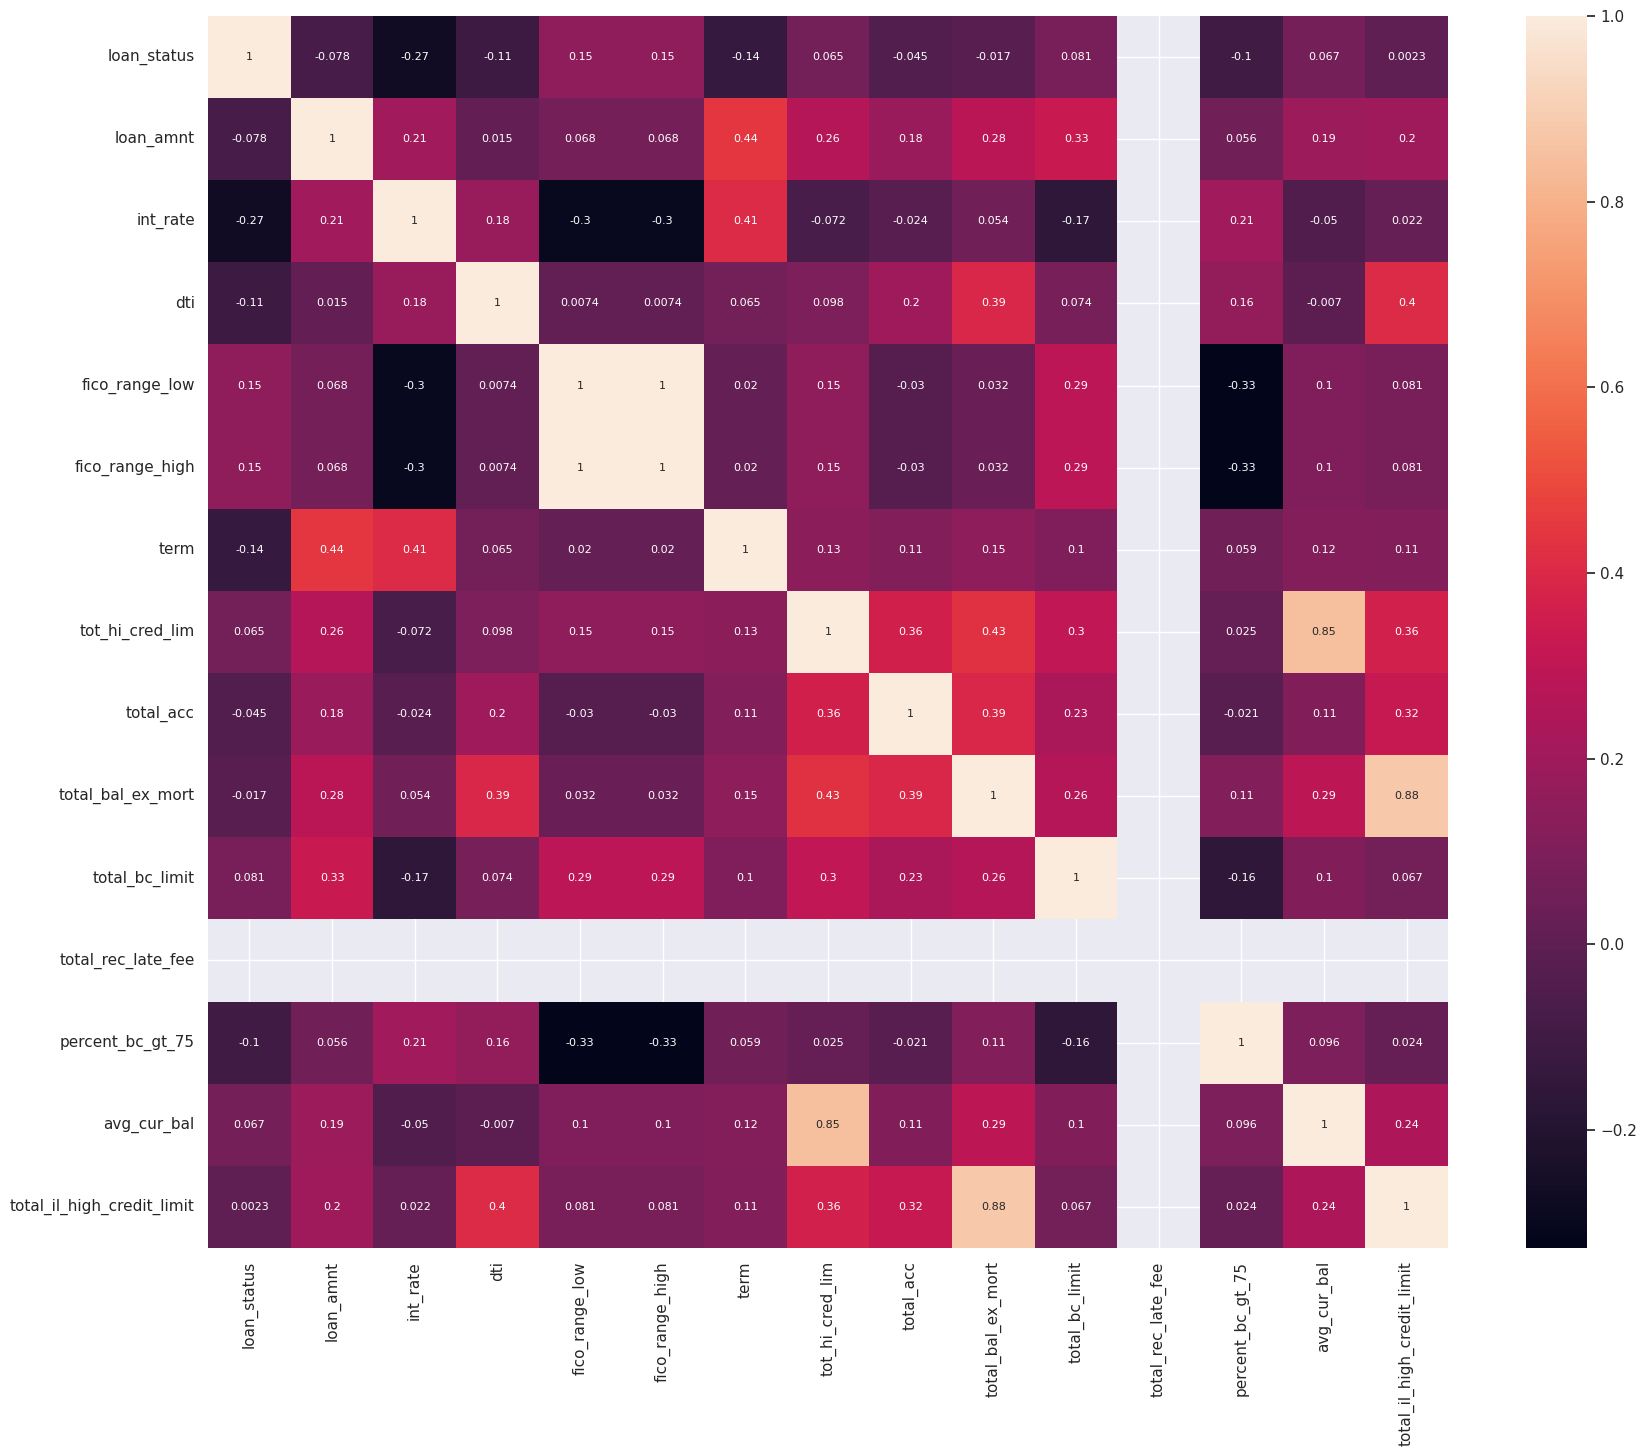

In [147]:
plt.figure(figsize=(20, 16))
sns.heatmap(df2_clean.corr(), fmt='.2g', annot=True, annot_kws={"fontsize": 8})

##Definiendo vector de características (X) y variable target (y)##

In [159]:
X = df2_upsampled.drop('loan_status', axis=1)
y = df2_upsampled['loan_status']

##Dividir arrais o matrices en subconjuntos aleatorios de entrenamiento y prueba.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html##

Para ser precisos, el método split() genera los índices de entrenamiento y prueba, no los datos en si mismos.

Tener múltiples divisiones puede ser útil si desea estimar mejor el rendimiento de su modelo.

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

##Imputar el modelo##

In [161]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [163]:
y_pred = LR.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 60.03 %


In [164]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.6002806984157191
Precision Score :  0.6002806984157191
Recall Score :  0.6002806984157191
Jaccard Score :  0.4288579129660409


In [165]:
from sklearn.metrics import classification_report

In [166]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.61      0.60    314827
           1       0.60      0.59      0.60    315743

    accuracy                           0.60    630570
   macro avg       0.60      0.60      0.60    630570
weighted avg       0.60      0.60      0.60    630570



In [167]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

<Figure size 900x900 with 0 Axes>

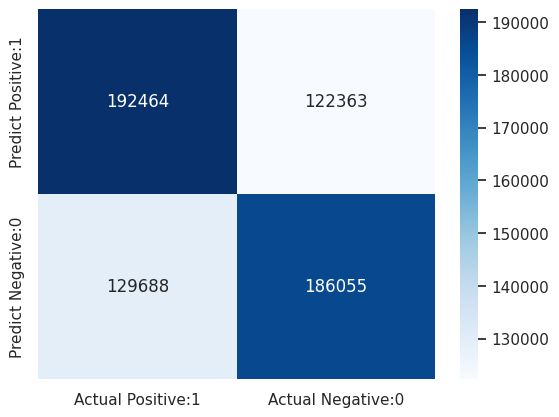

<Figure size 900x900 with 0 Axes>

In [168]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [177]:
# Grupo 1 (ya proporcionado)
features_to_select_1 = ["loan_status","loan_amnt","int_rate","dti","tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit"]

# Grupo 2
features_to_select_2 = ["loan_status","loan_amnt","int_rate","tot_hi_cred_lim","total_bal_ex_mort"]

# Grupo 3
features_to_select_3 = ["loan_status","loan_amnt","int_rate","tot_hi_cred_lim","total_acc","total_bal_ex_mort"]

# Grupo 4
features_to_select_4 = ["loan_status","loan_amnt","int_rate"]

# Grupo 5
features_to_select_5 = ["loan_status","int_rate"]

In [178]:
df3_1 = df2_upsampled[features_to_select_1]
df3_2 = df2_upsampled[features_to_select_2]
df3_3 = df2_upsampled[features_to_select_3]
df3_4 = df2_upsampled[features_to_select_4]
df3_5 = df2_upsampled[features_to_select_5]

##Definiendo vector de características (X) y variable target (y)##

In [179]:
X_1 = df3_1.drop('loan_status', axis=1)
y_1 = df3_1['loan_status']

X_2 = df3_2.drop('loan_status', axis=1)
y_2 = df3_2['loan_status']

X_3 = df3_3.drop('loan_status', axis=1)
y_3 = df3_3['loan_status']

X_4 = df3_4.drop('loan_status', axis=1)
y_4 = df3_4['loan_status']

X_5 = df3_5.drop('loan_status', axis=1)
y_5 = df3_5['loan_status']

##Dividir arrais o matrices en subconjuntos aleatorios de entrenamiento y prueba.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html##

Para ser precisos, el método split() genera los índices de entrenamiento y prueba, no los datos en si mismos.

Tener múltiples divisiones puede ser útil si desea estimar mejor el rendimiento de su modelo.

In [180]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1,y_1, test_size=0.2,random_state=0)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=0)
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.2, random_state=0)
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y_4, test_size=0.2, random_state=0)
X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X_5, y_5, test_size=0.2, random_state=0)

In [183]:
LR1 = LogisticRegression()
LR1.fit(X_1_train, y_1_train)

LR2 = LogisticRegression()
LR2.fit(X_2_train, y_2_train)

LR3 = LogisticRegression()
LR3.fit(X_3_train, y_3_train)

LR4 = LogisticRegression()
LR4.fit(X_4_train, y_4_train)

LR5 = LogisticRegression()
LR5.fit(X_5_train, y_5_train)

LogisticRegression()

In [184]:
y_pred = LR1.predict(X_1_test)
print("Accuracy Score for Group 1:", round(accuracy_score(y_1_test, y_pred)*100 ,2), "%")

y_pred_2 = LR2.predict(X_2_test)
print("Accuracy Score for Group 2:", round(accuracy_score(y_2_test, y_pred_2)*100 ,2), "%")

y_pred_3 = LR3.predict(X_3_test)
print("Accuracy Score for Group 3:", round(accuracy_score(y_3_test, y_pred_3)*100 ,2), "%")

y_pred_4 = LR4.predict(X_4_test)
print("Accuracy Score for Group 4:", round(accuracy_score(y_4_test, y_pred_4)*100 ,2), "%")

y_pred_5 = LR5.predict(X_5_test)
print("Accuracy Score for Group 5:", round(accuracy_score(y_5_test, y_pred_5)*100 ,2), "%")

Accuracy Score for Group 1: 58.15 %
Accuracy Score for Group 2: 56.16 %
Accuracy Score for Group 3: 56.16 %
Accuracy Score for Group 4: 62.48 %
Accuracy Score for Group 5: 62.5 %
